In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import signal
from scipy.stats import entropy
import antropy as ant

In [4]:
p = np.array([0.3,0.36,0.33,0.222,0.305])
pn = p/sum(p)
H = -sum(pn*np.log(pn))
print(f'{pn} with sum {sum(pn)} | entropy is {H}')

[0.19775873 0.23731048 0.21753461 0.14634146 0.20105471] with sum 1.0 | entropy is 1.5974482915886137


PSD1 shape is (129,) with SE of 0.8502857019375019 | SE_bar1 is 4.132228851318359
PSD2 shape is (129,) with SE of 0.4673246414136699 | SE_bar2 is 2.2711100578308105
PSD3 hape is (129,) with SE of 0.7702058003231973 | SE_bar3 is 3.743055820465088
PSD4 shape is (129,) with SE of 0.4459448270901373 | SE_bar4 is 2.167210102081299
ZCR for 1 : mean 0.3079975797266515

ZCR for 2 : mean 0.14050598839692482

ZCR for 3 : mean 0.19833672942767655

ZCR for 4 : mean 0.025539045016783887



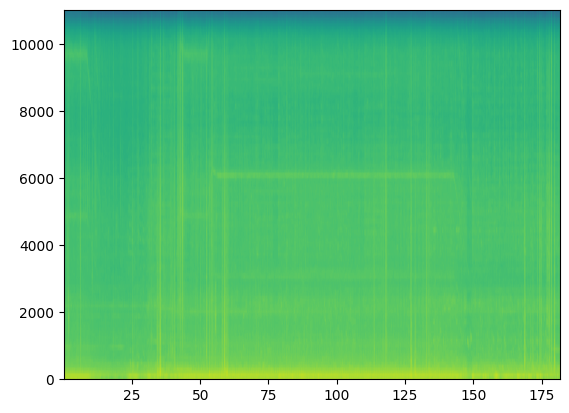

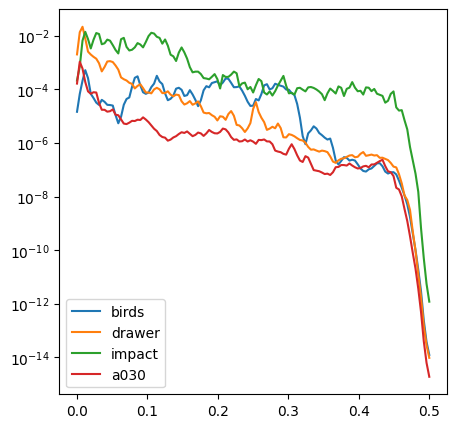

In [18]:
y1, sr = librosa.load('birds_10s.wav')
y2, sr = librosa.load('drawer_10s.wav')
y3, sr = librosa.load('impact_10s.wav')
y4, sr = librosa.load('/Users/yusuf/Documents/MSc/SEAL/data/datasets/TUT-sound-events-2016-development/audio/home/a030.wav')


S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64,fmax=8000)
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=64,fmax=8000)
S3 = librosa.feature.melspectrogram(y=y3, sr=sr, n_mels=64,fmax=8000)
S4 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64,fmax=8000)

# S, phase = librosa.magphase(librosa.stft(y))

fig, ax = plt.subplots()
plt.specgram(y1,Fs=sr)
plt.specgram(y2,Fs=sr)
plt.specgram(y3,Fs=sr)
plt.specgram(y4,Fs=sr)

freqs, psd1 = signal.welch(y1)
freqs, psd2 = signal.welch(y2)
freqs, psd3 = signal.welch(y3)
freqs, psd4 = signal.welch(y4)
plt.figure(figsize=(5, 5))
plt.semilogy(freqs, psd1,label='birds')
plt.semilogy(freqs, psd2,label='drawer')
plt.semilogy(freqs, psd3,label='impact')
plt.semilogy(freqs, psd4,label='a030')
plt.legend()

SE1 = ant.spectral_entropy(x=y1,sf=16000,method='welch', normalize=True)
sigma_psd1 = psd1.sum()
npsd1 = psd1/sigma_psd1
SE_bar1 = entropy(npsd1)

SE2 = ant.spectral_entropy(x=y2,sf=16000,method='welch', normalize=True)
sigma_psd2 = psd2.sum()
npsd2 = psd2/sigma_psd2
SE_bar2 = entropy(npsd2)

SE3 = ant.spectral_entropy(x=y3,sf=16000,method='welch', normalize=True)
sigma_psd3 = psd3.sum()
npsd3 = psd3/sigma_psd3
SE_bar3 = entropy(npsd3)

SE4 = ant.spectral_entropy(x=y4,sf=16000,method='welch', normalize=True)
sigma_psd4 = psd4.sum()
npsd4 = psd4/sigma_psd4
SE_bar4 = entropy(npsd4)

# SE2 = ant.spectral_entropy(x=y2,sf=16000,method='welch', normalize=True)
# SE3 = ant.spectral_entropy(x=y3,sf=16000,method='welch', normalize=True)
# SE4 = ant.spectral_entropy(x=y,sf=16000,method='welch', normalize=True)
# print(f'SE for birds is {SE1}\nSE for drawer is {SE2}\nSE for impact is {SE3}\nSE for entire a030_home file in TUTSED16 is {SE4}')
print(f'PSD1 shape is {psd1.shape} with SE of {SE1} | SE_bar1 is {SE_bar1}')
print(f'PSD2 shape is {psd2.shape} with SE of {SE2} | SE_bar2 is {SE_bar2}')
print(f'PSD3 hape is {psd3.shape} with SE of {SE3} | SE_bar3 is {SE_bar3}')
print(f'PSD4 shape is {psd4.shape} with SE of {SE4} | SE_bar4 is {SE_bar4}')

## Mean ZCR
ZCR1 = librosa.feature.zero_crossing_rate(y1)
ZCR2 = librosa.feature.zero_crossing_rate(y2)
ZCR3 = librosa.feature.zero_crossing_rate(y3)
ZCR4 = librosa.feature.zero_crossing_rate(y4)

print(f'ZCR for 1 : mean {ZCR1.mean()}\n')
print(f'ZCR for 2 : mean {ZCR2.mean()}\n')
print(f'ZCR for 3 : mean {ZCR3.mean()}\n')
print(f'ZCR for 4 : mean {ZCR4.mean()}\n')
